# Assignment: Sentiment Analysis Using Recurrent Neural Networks (RNN) with IMDB Dataset

Norma Parra - c0914632

https://github.com/nparra75/MovieReview_SentimentAnalysis_RNN.git

The objective of this assignment is to implement a Recurrent Neural Network (RNN) using TensorFlow to perform sentiment analysis on the IMDB movie review dataset. You will train the RNN to classify movie reviews as positive or negative and analyze the model's performance.

## Import Libraries required

In [ ]:
# Use the IMDB dataset provided by TensorFlow

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

The IMDB Movie Reviews dataset is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as positive or negative.
25,000 movie reviews for training and 25,000 for testing.

In [ ]:
# Set random seed for reproducibility
#np.random.seed(42)
tf.random.set_seed(42)

## Dataset Preparation

### Load IMDB Dataset

In [ ]:
#Load the dataset and perform necessary preprocessing, including: Tokenizing the text and converting tokens to numerical format; Padding sequences to ensure uniform input length

max_features=10000 #  Maximum number of most frequent words to keep

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Visualize the dataset

In [ ]:
# Print dataset information
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))


Training data shape: (25000,)
Testing data shape: (25000,)
Number of training samples: 25000
Number of testing samples: 25000


#### View Raw Dataset

In [ ]:
# Display first review and its label
print("First review (tokenized):", x_train[0])
print("First review length:", len(x_train[0]))
print("First review label:", y_train[0])

First review (tokenized): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
First review length: 218
First rev

The dataset is already tokenized => each word is represented by an integer

####  Decode the tokenized reviews to text using the IMDB word index provided by TensorFlow.
Visualize 3 samples of how looks like the reviews

In [ ]:
# Retrieve the word index
word_index = imdb.get_word_index() #  The word index dictionary. Keys are word strings, values are their index

# Reverse word index to decode
reverse_word_index = {value: key for key, value in word_index.items()}

# Display a few decoded reviews with their labels
for i in range(3):
    decoded_review = " ".join([reverse_word_index.get(j - 3, "?") for j in x_train[i]])
    print(f"Review {i + 1}: {decoded_review}")
    print(f"Label: {'Positive' if y_train[i] == 1 else 'Negative'}")
    print("-" * 80)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Review 1: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing 

### Preprocess the Data

In [ ]:
max_length = 200  # Maximum review length (padding/truncation)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

In [ ]:
# Display
print("First review (tokenized):", x_train[0])
print("First review length:", len(x_train[0]))
print("First review label:", y_train[0])

First review (tokenized): [   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113 

## Build the RNN Model Base

### Define the model architecture for Model Base

It is defined a sequential model for binary classification problem, to make sentiment analysis

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length), # First layer that converts tokens into dense vectors of fixed size
    LSTM(64, return_sequences=False),                                    # RNN that processes sequential data
    Dense(64, activation='relu'),                                        # Fully connected layer
    Dense(1, activation='sigmoid')                                       # Output layer with sigmoid activation for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compile the model

Since the model is binary classification it is used:

- Optimizer: adam
- Loss Function: binary_crossentropy
- Metric: accuracy


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the Model

#### Split the dataset into training and validation sets

In [ ]:
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### Train the Model
Train the model on the training set and validate it on the validation set.

It is used early_stopping, as regularization technique to prevent overfitting and save training time, using the training patience =3, for stop training if the metric doesn't improve for 3 consecutive epoch.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train_split, y_train_split,epochs=10,batch_size=32,validation_data=(x_val, y_val),callbacks=[early_stopping])



Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 154ms/step - accuracy: 0.5389 - loss: 0.6790 - val_accuracy: 0.5546 - val_loss: 0.6560
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 148ms/step - accuracy: 0.6396 - loss: 0.5809 - val_accuracy: 0.8260 - val_loss: 0.4256
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 147ms/step - accuracy: 0.8247 - loss: 0.4141 - val_accuracy: 0.8652 - val_loss: 0.3273
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 148ms/step - accuracy: 0.9207 - loss: 0.2035 - val_accuracy: 0.8690 - val_loss: 0.3337
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 146ms/step - accuracy: 0.9560 - loss: 0.1276 - val_accuracy: 0.8622 - val_loss: 0.4207
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 147ms/step - accuracy: 0.9736 - loss: 0.0865 - val_accuracy: 0.8598 - val_loss: 0.4869


## Evaluating the Model

### Evaluate the model’s performance using accuracy and loss

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8618 - loss: 0.3404
Test Accuracy: 0.86


### Plot the training and validation loss and accuracy over epochs to visualize the training process.

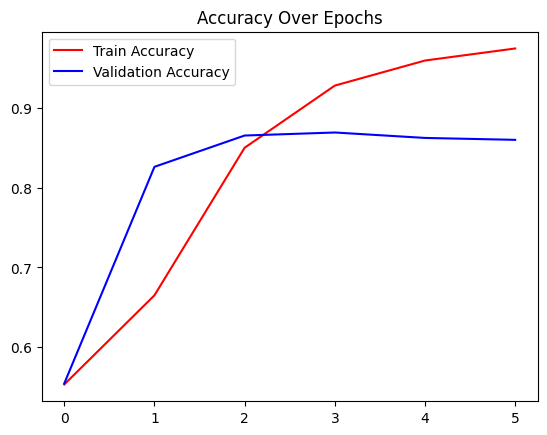

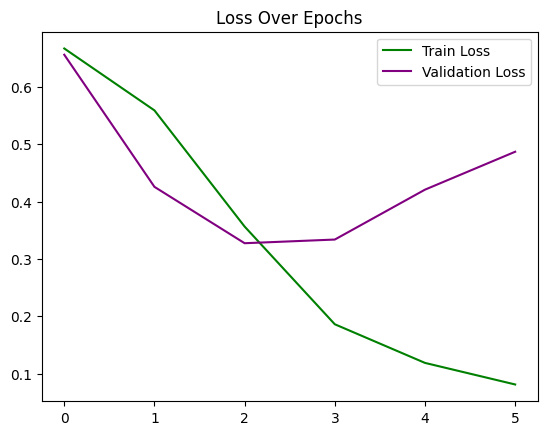

In [ ]:
# Plot Accuracy
plt.plot(history.history['accuracy'], color = 'red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], color='green', label='Train Loss')
plt.plot(history.history['val_loss'], color='purple' ,label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

Training Performance:

- Training accuracy improves over the epochs, which indicates that the model is learning well on the training data, by the last epoch it is 0.95.
- Training loss decreases over the epochs, showing that the model is minimizing the error on the training data.
- The model learns well on the training data, increasing training accuracy and decreasing training loss.

Validation Performance:

- The validation accuracy reaches a level and then remains the same, and validation loss starts increasing after an epoch 3 approximately, which indicates overfitting.
- Validation loss decreases initially, but starts increasing after epoch 2 and 3, while training loss continues to decrease it is an indication of overfitting

## Hyperparameter Tuning
To reduce overfitting and improve model performance, it is used different techniques

### 1. Increase LSTM to 128 Units

In [ ]:
model_v1 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_v1 = model_v1.fit(x_train_split, y_train_split,epochs=10,batch_size=32,validation_data=(x_val, y_val),callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 245s 388ms/step - accuracy: 0.5446 - loss: 0.6721 - val_accuracy: 0.6394 - val_loss: 0.5900
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 390ms/step - accuracy: 0.7041 - loss: 0.5204 - val_accuracy: 0.6156 - val_loss: 0.6311
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 388ms/step - accuracy: 0.7564 - loss: 0.5010 - val_accuracy: 0.8176 - val_loss: 0.4440
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 384ms/step - accuracy: 0.8826 - loss: 0.2964 - val_accuracy: 0.8646 - val_loss: 0.3347
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 384ms/step - accuracy: 0.9364 - loss: 0.1822 - val_accuracy: 0.8622 - val_loss: 0.3734
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 388ms/step - accuracy: 0.9638 - loss: 0.1165 - val_accuracy: 0.8654 - val_loss: 0.4107
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 252s 404ms/step - accuracy: 0.9790 - loss: 0.0739 - val_accuracy: 0.8674 - val_loss: 0.4901


In [ ]:
test_loss_v1, test_accuracy_v1 = model_v1.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy_v1:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.8620 - loss: 0.3383
Test Accuracy: 0.86


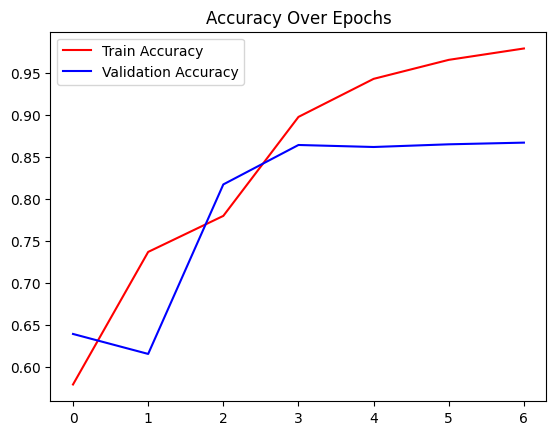

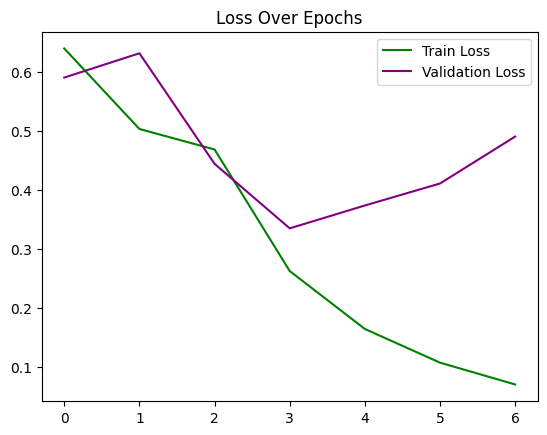

In [ ]:
# Plot Accuracy
plt.plot(history_v1.history['accuracy'], color = 'red', label='Train Accuracy')
plt.plot(history_v1.history['val_accuracy'], color = 'blue', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot Loss
plt.plot(history_v1.history['loss'], color='green', label='Train Loss')
plt.plot(history_v1.history['val_loss'], color='purple' ,label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

Increasing LSTM to 128 Unit has a slightly improved in learning capacity, the test accuracy increse to 0.8620. However the gap between training and validation accuracy indicates that the model is still overfitting

### 2. Dropout as regularization technique
It is added Dropout layers after the LSTM and Dense layers to reduce overfitting

In [ ]:
model_v2 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_v2 = model_v2.fit(x_train_split, y_train_split,epochs=10,batch_size=32,validation_data=(x_val, y_val),callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 392ms/step - accuracy: 0.5355 - loss: 0.6797 - val_accuracy: 0.5546 - val_loss: 0.6671
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 392ms/step - accuracy: 0.6198 - loss: 0.6134 - val_accuracy: 0.6698 - val_loss: 0.5980
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 388ms/step - accuracy: 0.7471 - loss: 0.5139 - val_accuracy: 0.8104 - val_loss: 0.4546
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 245s 392ms/step - accuracy: 0.8461 - loss: 0.3705 - val_accuracy: 0.8148 - val_loss: 0.4309
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 387ms/step - accuracy: 0.8880 - loss: 0.2982 - val_accuracy: 0.8558 - val_loss: 0.3997
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 383ms/step - accuracy: 0.9181 - loss: 0.2266 - val_accuracy: 0.8624 - val_loss: 0.3923
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 387ms/step - accuracy: 0.9417 - loss: 0.1665 - val_accuracy: 0.8604 - val_loss: 0.4185
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 388ms/step - accuracy: 0.9609 -

In [ ]:
test_loss_v2, test_accuracy_v2 = model_v2.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy_v2:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.8544 - loss: 0.4049
Test Accuracy: 0.85


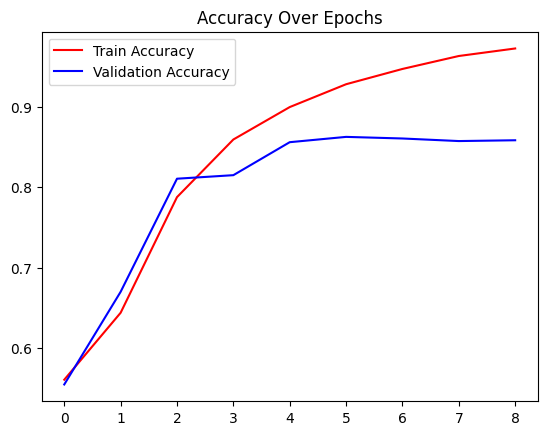

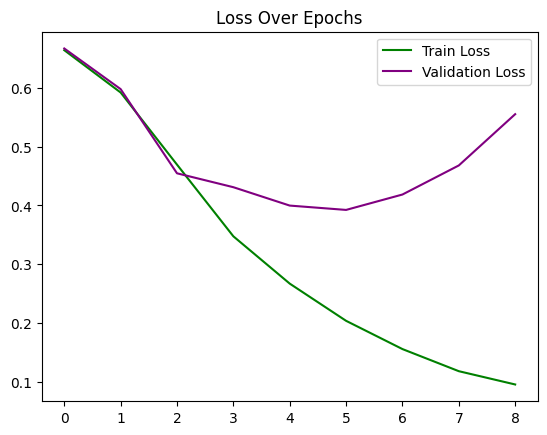

In [ ]:
# Plot Accuracy
plt.plot(history_v2.history['accuracy'], color = 'red', label='Train Accuracy')
plt.plot(history_v2.history['val_accuracy'], color = 'blue', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot Loss
plt.plot(history_v2.history['loss'], color='green', label='Train Loss')
plt.plot(history_v2.history['val_loss'], color='purple' ,label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

Adding the LSTM and dropout layer, the model obtained a validation accuracy of 0.8544 and a loss of 0.4049.
The increase in validation loss indicates that the current model is less efficient at generalizing to unseen data compared to the previous (model_v1).
However, the validation accuracy is still high, which indicates that the model has an acceptable performance.
While dropout helped mitigate overfitting in some of the model, it slightly reduced the validation accuracy.

### 3. Adding a second LSTM layer and keeping the Dropout layers

In [ ]:
model_v3 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    LSTM( 64, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_v3 = model_v3.fit(x_train_split, y_train_split,epochs=10,batch_size=32,validation_data=(x_val, y_val),callbacks=[early_stopping])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 265ms/step - accuracy: 0.5451 - loss: 0.6801 - val_accuracy: 0.5790 - val_loss: 0.6512
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.6431 - loss: 0.6009 - val_accuracy: 0.7552 - val_loss: 0.5303
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 263ms/step - accuracy: 0.8275 - loss: 0.4122 - val_accuracy: 0.8580 - val_loss: 0.3401
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 271ms/step - accuracy: 0.9025 - loss: 0.2551 - val_accuracy: 0.8706 - val_loss: 0.3134
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.9408 - loss: 0.1747 - val_accuracy: 0.8676 - val_loss: 0.3614
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 267ms/step - accuracy: 0.9601 - loss: 0.1243 - val_accuracy: 0.8626 - val_loss: 0.4136
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 266ms/step - accuracy: 0.9734 - loss: 0.0907 - val_accuracy: 0.8578 - val_loss: 0.4785


In [ ]:
test_loss_v3, test_accuracy_v3 = model_v3.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy_v3:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.8637 - loss: 0.3352
Test Accuracy: 0.87


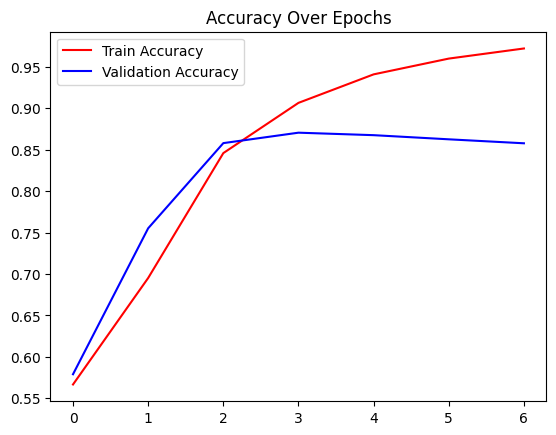

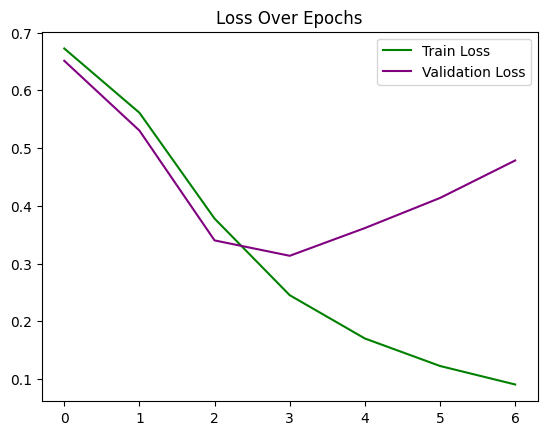

In [ ]:
# Plot Accuracy
plt.plot(history_v3.history['accuracy'], color = 'red', label='Train Accuracy')
plt.plot(history_v3.history['val_accuracy'], color = 'blue', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot Loss
plt.plot(history_v3.history['loss'], color='green', label='Train Loss')
plt.plot(history_v3.history['val_loss'], color='purple' ,label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

 Model Performance obtained is accuracy: 0.8637 - loss: 0.3352. This is an improvement over the previous model_v2 (accuracy: 0.8544, loss: 0.4049), indicating that the additional LSTM layer and optimized dropout regularization have improved the model's performance.
- The plot of Training Accuracy and Validation Accuracy indicates that the model performs well but stops improving after epochs 2 - 3. The Gap between both accuracy datasets suggest that there is overfitting, but the dropout layers can help to control it.
- The plot of Training Loss shows that it decreases steadily over the epochs, while the Validation Loss starts increasing around the epoch 3.
- Overall Validation loss is lower compared to the previous models (model_v1 and model_v2), this suggests that the hyperparameter adjusted in this model improved to have a better generalization.

## Comparative Analysis

### Implement another neural network architecture

### 1D Convolutional Neural Network (1D-CNN)

- Stack additional Conv1D and MaxPooling1D layers to increase the model's capacity to learn complex features
- Add batch normalization layers after the convolutional layers to stabilize training and improve generalization
- Use GlobalMaxPooling1D for better feature summarization
- Add Dropout Layers to regularize the fully connected and convolutional layers to reduce overfitting
- Lower the learning rate for the Adam optimizer for more stable training

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, GlobalMaxPooling1D, Dropout, BatchNormalization

model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    Conv1D(128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_cnn = model_cnn.fit(x_train_split, y_train_split,epochs=10,batch_size=32,validation_data=(x_val, y_val),callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 155ms/step - accuracy: 0.5050 - loss: 1.7919 - val_accuracy: 0.5864 - val_loss: 1.1304
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 141ms/step - accuracy: 0.5745 - loss: 1.1185 - val_accuracy: 0.6622 - val_loss: 0.9683
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.6907 - loss: 0.9133 - val_accuracy: 0.7740 - val_loss: 0.7727
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 137ms/step - accuracy: 0.8054 - loss: 0.7155 - val_accuracy: 0.8162 - val_loss: 0.6670
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 137ms/step - accuracy: 0.8645 - loss: 0.5789 - val_accuracy: 0.8370 - val_loss: 0.6031
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 144ms/step - accuracy: 0.9042 - loss: 0.4772 - val_accuracy: 0.8458 - val_loss: 0.5825
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 138ms/step - accuracy: 0.9286 - loss: 0.3931 - val_accuracy: 0.8456 - val_loss: 0.5841
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 141ms/step - accuracy: 0.9505 - l

In [ ]:
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy_cnn:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8403 - loss: 0.5837
Test Accuracy: 0.84


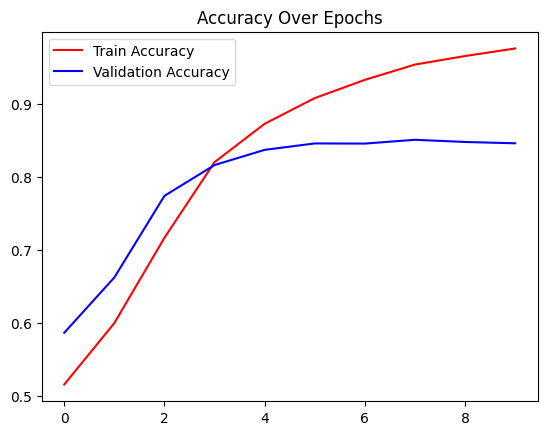

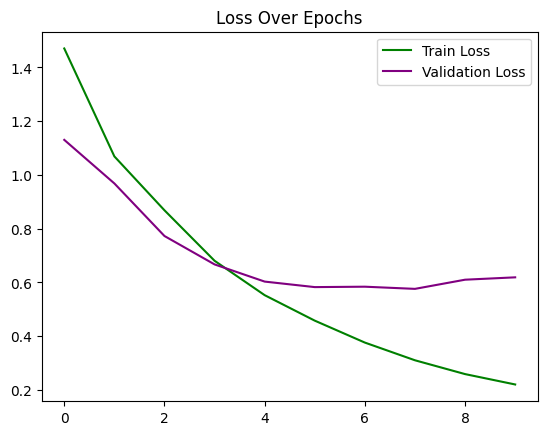

In [ ]:
# Plot Accuracy
plt.plot(history_cnn.history['accuracy'], color = 'red', label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], color = 'blue', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot Loss
plt.plot(history_cnn.history['loss'], color='green', label='Train Loss')
plt.plot(history_cnn.history['val_loss'], color='purple' ,label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

The model reaches high training accuracy but performs worse on the validation set, as indicated by a significant gap between training and validation accuracy.
Overfitting is evident due to the increasing divergence between validation loss and training loss after epoch 4.
The test accuracy of 0.8403 and loss of 0.5837 indicate that the model struggles to generalize well.
The model’s performance can be improved using regularization techniques.


### Feedforward Neural Network (FNN)

#### Define the FNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

# Define the FNN model
fnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),  # Embedding layer
    GlobalAveragePooling1D(),                                      # Summarize embeddings
    Dense(64, activation='relu'),                                  # Hidden layer
    Dropout(0.3),                                                  # Regularization to prevent overfitting
    Dense(32, activation='relu'),                                  # Another hidden layer
    Dropout(0.3),                                                  # Another Dropout
    Dense(1, activation='sigmoid')                                 # Output layer for binary classification
])

# Compile the model
fnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Train the Model

In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_fnn = fnn_model.fit(x_train_split, y_train_split, validation_data=(x_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6641 - loss: 0.5825 - val_accuracy: 0.8742 - val_loss: 0.3048
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8773 - loss: 0.2972 - val_accuracy: 0.8786 - val_loss: 0.2919
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9129 - loss: 0.2308 - val_accuracy: 0.8734 - val_loss: 0.3082
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9210 - loss: 0.2119 - val_accuracy: 0.8750 - val_loss: 0.3223
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9319 - loss: 0.1937 - val_accuracy: 0.8694 - val_loss: 0.3705
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9456 - loss: 0.1542 - val_accuracy: 0.8606 - val_loss: 0.4745
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9457 - loss: 0.1495 - val_accuracy: 0.8560 - val_loss: 0.4407


#### Evaluate the Model

In [ ]:
# Evaluate the FNN
test_loss_fnn, test_accuracy_fnn = fnn_model.evaluate(x_test, y_test)
print(f"FNN Test Accuracy: {test_accuracy_fnn:.4f}, Test Loss: {test_loss_fnn:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8739 - loss: 0.3075
FNN Test Accuracy: 0.8734, Test Loss: 0.3069


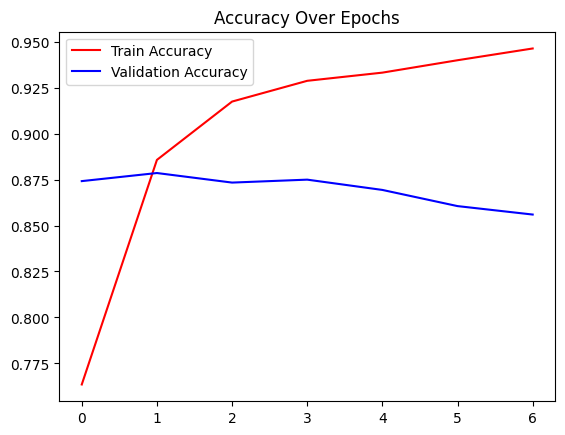

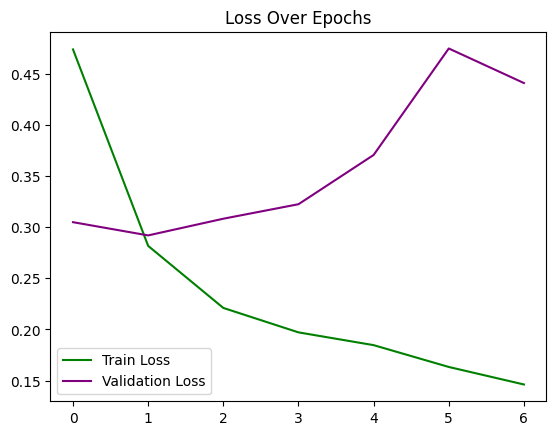

In [ ]:
# Plot Accuracy
plt.plot(history_fnn.history['accuracy'], color = 'red', label='Train Accuracy')
plt.plot(history_fnn.history['val_accuracy'], color = 'blue', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot Loss
plt.plot(history_fnn.history['loss'], color='green', label='Train Loss')
plt.plot(history_fnn.history['val_loss'], color='purple' ,label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

it is observed:
- Overfitting:
  - The validation accuracy peaks early in epoch 2 aproximately and decrease as training progresses, indicating that the model is overfitting
  - The validation loss starts increasing while the training loss continues to decrease, which confirms overfitting.

  - Model Performance:
    - The validation accuracy of 0.8739 is acceptable but lower than the training accuracy, indicating that the model not generalize effectively.
    - FNN performs generalization ability is limited compared to other architectures implemented before such as RNN that suited better for sequential data.